## Number of synapses per connection

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from bluepysnap import Circuit
from bluepysnap.bbp import Cell

Reading and preparing the data

In [2]:
circuit_path = '/home/data-bbp/20191017/circuit/sonata/circuit_config.json'
circ = Circuit(circuit_path, node_population='All', edge_population='default')

In [3]:
mtypes = circ.nodes.property_values(Cell.MTYPE)
model_mean = pd.DataFrame(index=mtypes, columns=mtypes.union({u'PV'}), dtype=float)
model_std = pd.DataFrame(index=mtypes, columns=mtypes.union({u'PV'}), dtype=float)

In [4]:
nsample = 100
def sample_nsyn(pre, post):
    it = circ.edges.iter_connections(pre, post, return_edge_count=True)
    return np.array([p[2] for p in itertools.islice(it, nsample)])

In the following cell, ...

In [5]:
for pre_mtype in mtypes:
    for post_mtype in mtypes:
        data = sample_nsyn(
            pre={Cell.MTYPE: pre_mtype, Cell.REGION: {'$regex': 'mc2.*'}},
            post={Cell.MTYPE: post_mtype}
        )
        if len(data) != 0:
            model_mean[post_mtype][pre_mtype] = data.mean()
            model_std[post_mtype][pre_mtype] = data.std()
    print(pre_mtype)

RuntimeError: Unable to open the attribute "node_population": (Attribute) Object not found

In [6]:
model_mean

,SO_BS,SP_BS,SP_AA,PV,SO_OLM,SO_BP,SR_SCA,SP_Ivy,SO_Tri,SLM_PPA,SP_CCKBC,SP_PVBC,SP_PC
SO_BS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_BS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO_OLM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO_BP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SR_SCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_Ivy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO_Tri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLM_PPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_CCKBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ax = seaborn.heatmap(model_mean)

fig = plt.gcf()
fig.suptitle('Number of synapses per connection', )

ax.set_xlabel('presynaptic mtype')
ax.set_ylabel('postsynaptic mtype')

ax.collections[0].colorbar.set_label("# synapses")

fig.show()

ValueError: zero-size array to reduction operation minimum which has no identity

In [8]:
# reference biological dataset
bio_path = '/home/data-bbp/20191017/circuit/bioname/nsyn_per_connection_20190131.tsv'

In [9]:
df = pd.read_csv(bio_path, skiprows=1, names=['pre', 'post', 'bio_mean', 'bio_std'], usecols=[0, 1, 2, 3], delim_whitespace=True)
df.head()

,pre,post,bio_mean,bio_std
0,SP_BS,SP_PC,6.000000,0.000000
1,SP_PVBC,PV,1.546875,1.083182
2,SP_PC,SO_OLM,2.800000,0.800000
3,SO_OLM,SP_PC,10.000000,7.000000
4,SP_AA,SP_PC,6.100000,NaN


In [10]:
df['mod_mean'] = np.NAN
df['mod_std'] = np.NAN

In [11]:
for idx in df.index:
    pre = df.loc[idx, 'pre']
    post = df.loc[idx, 'post']
    df.loc[idx, 'mod_mean'] = model_mean[post][pre]
    df.loc[idx, 'mod_std'] = model_std[post][pre]

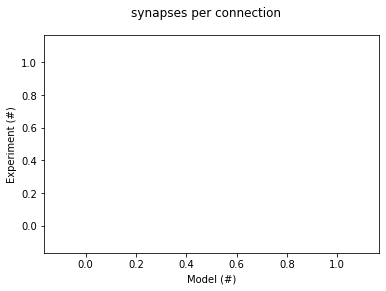

In [12]:
plt.clf
x = df['mod_mean'].values
y = df['bio_mean'].values
l = np.linspace(0, max(x.max(), y.max()), 50)
fig, ax = plt.subplots()
fig.suptitle('synapses per connection')
ax.plot(x, y, 'o')
ax.errorbar(x, y, xerr=df['mod_std'].values, yerr=df['bio_std'].values, fmt='o', ecolor='g', capthick=2)
ax.plot(l, l, 'k--')
ax.set_xlabel('Model (#)')
ax.set_ylabel('Experiment (#)')

fig.show()

### Exercise #1
Calculate the average number of synapses per connection in t he four classes of connections (EE, EI, IE, II). Put the answer in a list called ans_3. Respect the order (EE, EI, IE, II).

### Exercise #2
Calculate the distribution of number of synapses from SP_PVBC to SP_PC. Put the answer in a list named ans_4 with mean and std

In [ ]:
# Work here

In [ ]:
# This is to generate the answers to paste in the submission box below.
# Run this and copy-paste the output into the box below
print json.dumps(dict([("ans_3", ans_3),
                       ("ans_4", ans_4)]))

In [ ]:
!pip -q install -i https://bbpteam.epfl.ch/repository/devpi/simple/ single-cell-mooc-client==0.0.5 
import single_cell_mooc_client as sc_mc
s = sc_mc.Submission(hideToken=True)

In [ ]:
s.show_submission(ROLLBACK, TOKEN)